# Analyse de données multidimensionnelles
## Entrez ici vos noms et prénoms

# TP 2: Utiliser l'analyse en composantes principales de `scikit-learn`




---
Ce notebook contient votre compte-rendu pour le TP2.
Il s'agit d'un travail que nous commencerons ensemble, puis que vous pouvez continuer de votre côté jusqu'à la date limite de soumission qui est le __jeudi 26 novembre à 23h59__.

---

# 1. Charger et manipuler des données LFW 

## a. Téléchargement des données

Dans ce TP, nous allons travailler avec un autre ensemble de données provenant du challenge [_labeled faces in the wild_](http://vis-www.cs.umass.edu/lfw/). Il s'agit d'un ensemble de photos de visages en noir et blanc.

In [2]:
# différents imports utiles par la suite
import pandas
import sklearn
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Téléchargement des données
d = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

## b. Accès aux données

Dans la cellule précédente, nous avons téléchargé des données contenant un gros milliers d'images noires et blanc de visages d'hommes politiques.  

Ces données sont regroupées dans variable `data_dict`, qui est un _dictionnaire_ ([dict](https://docs.python.org/3/library/stdtypes.html#mapping-types-dict)).

> Un dictionnaire est une structure de donnée qui permet de regrouper plusieurs valeurs hétérogènes, un peu à la manière d'une ligne donnée d'un `DataFrame` de pandas.
>
> Par exemple, on peut définir le dictionnaire suivant:
> ```python
student = {'name':'Dupont',
           'first name': 'Jean',
           'age': 23,
           'marks': [10, 13, 15.5, 11]
           }
  ```
> Il est constitué de 4 entrées appelées _clés_ (keys), qu'on peut lister par la méthode du même nom:
> ```python
  student.keys()
  ```  
> Et  on peut accéder à une entrée donnée par l'opérateur `[]` ou bien par `.`:
>```python
student['age']
student.age
```


In [3]:
# listez les clés de la variable `d`
d.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

## c. Manipulations élémentaires de `ndarrays`

Affichez le type de toutes les entrées de `d`

> utilisez les fonctions `print` et `type` dans une boucle `for`

In [4]:
# Votre travail ici
for key in d.keys():
  print(type(d[key]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'str'>


Comme vous le voyez, les données sont des [`ndarray`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html), la structure de base de la bibliothèque `numpy` qu'on a déja vue.

Cette structure très puissante de données numériques permet de facilement faire des calculs et accédez à des données.

In [5]:
# Affichez la dimension de d.images (utilisez la propriété `shape` des `ndarrays`)
...
d.images.shape
# (comme on le voit, c'est un tableau 3D.)

(1560, 50, 37)

In [6]:
# créez les variables nb_samples, height et width correspondantes
# (indice: testez d'abord `a, b, c = [1, 2, 3] )
...
nb_samples = d.images.shape[0]
height = d.images.shape[1]
width = d.images.shape[2]

print(nb_samples)
print(height)
print(width)

1560
50
37


Comme vous le constatez, `d.images` regroupe $1560$ images, chacune étant de dimensions $50\times 37=1850$ pixels.

In [7]:
# chaque ligne de `d.data` n'est rien d'autre que la version aplatie de l'image
# correspondante dans `d.images`. 
print('Are d.data[10] and d.images[10].flatten() the same ?',
      np.allclose(d.data[10], d.images[10].flatten()))
# (où on a rencontré la fonction `allclose` de numpy qui compare des `ndarray`
# et la méthode `flatten` qui applatie un `ndarray`)


# en fait, on aurait pu construire cette version applatie très simplement, avec 
# la méthode `reshape` des `ndarray`:
flattened =  d.images.reshape((nb_samples, height * width))
print('Is `flattened` equal to `d.data` ? ', 
      np.allclose(flattened, d.data))

Are d.data[10] and d.images[10].flatten() the same ? True
Is `flattened` equal to `d.data` ?  True


In [8]:
# Pour extraire les 10 premières images, il suffit de faire:
d.data[:10]

# Pour extraire les pixels 50...99 des 10 premières images:
d.data[:10, 50:100]
# Il s'agit d'une sélection dans la ndarray `data`. C'est elle même une ndarray.
# 
print(d.data[:10, 50:100].shape)

(10, 50)


Maintenant, voyons quel est le nom des personnes dans les $10$ premières images.

In [9]:
print(d)

{'data': array([[ 83.      ,  91.666664, 112.      , ..., 112.333336, 146.      ,
        124.333336],
       [ 38.666668,  69.666664,  84.666664, ...,  67.      ,  88.333336,
        115.      ],
       [ 82.666664,  58.      ,  59.      , ..., 171.33333 ,  90.333336,
         82.333336],
       ...,
       [ 50.333332,  65.666664,  88.      , ..., 197.      , 179.33333 ,
        166.33333 ],
       [138.      , 158.66667 , 169.66667 , ..., 232.66667 , 228.33333 ,
        226.      ],
       [ 30.      ,  27.      ,  32.666668, ...,  35.      ,  35.333332,
         61.      ]], dtype=float32), 'images': array([[[ 83.      ,  91.666664, 112.      , ...,  54.333332,
          62.      ,  76.333336],
        [ 89.      ,  95.      , 100.      , ...,  51.666668,
          47.666668,  69.333336],
        [ 93.      ,  93.666664,  85.333336, ...,  62.      ,
          47.666668,  56.      ],
        ...,
        [ 48.666668,  46.666668,  45.666668, ..., 177.66667 ,
         131.33333 ,  89.

In [10]:
# Première solution: commentez chaque ligne

#Pour chaque numéro de target dans les dix premieres lignes de d
for index in range(10):
  #Afficher les noms correspondants à ces numéros de target
  print(d.target_names[d.target[index]])

Tony Blair
Gerhard Schroeder
Donald Rumsfeld
George W Bush
George W Bush
Colin Powell
Ariel Sharon
George W Bush
Colin Powell
George W Bush


In [11]:
# Deuxième solution: supprimez la boucle, et affichez ces 10 premières `target` directement
# (indice: utilisez [] deux fois, de manière imbriquée)
d.target_names[d.target[:10]]

array(['Tony Blair', 'Gerhard Schroeder', 'Donald Rumsfeld',
       'George W Bush', 'George W Bush', 'Colin Powell', 'Ariel Sharon',
       'George W Bush', 'Colin Powell', 'George W Bush'], dtype='<U17')

## b. Affichage 


Nous définissons maintenant deux fonctions utilitaires:
* `plot_images` qui prend en entrée: des images sous forme de lignes, un titre à indiquer pour la figure, et qui se charge d'un affichage
* `shuffle` mélange un lot d'images. C'est utile pour ne pas tout le temps afficher les mêmes premières si on n'a pas envie

In [37]:
#fonction utilitaire pour réorganiser aléatoirement des images
def shuffle_images(images):
  result = images.copy()
  np.random.shuffle(result)
  return result

# définition d'une fonction d'affichage
def plot_images(images, title='', n_row=3, n_col=4, shuffle=True):
    if shuffle:
        images = shuffle_images(images)
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row+0.5))
    plt.suptitle(title)
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.95, hspace=0, wspace=0)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

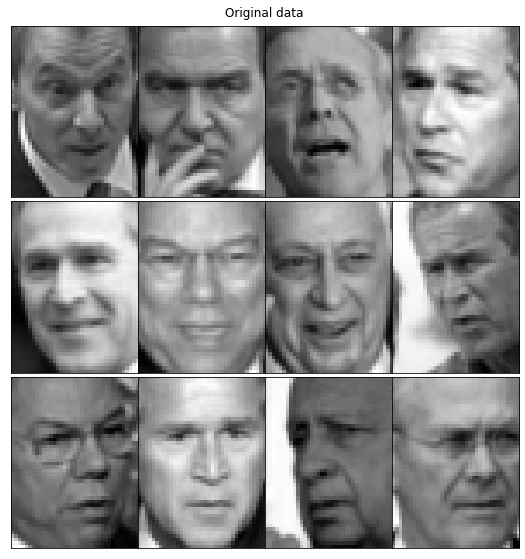

In [13]:
# Affichons les premières images
plot_images(d.data, 'Original data')

In [14]:
# Affiche le nombre d'image de chaque président dans le dictionnaire 
for (i, name) in enumerate(d.target_names):
  print('target %d, name: %s, number of matches: %d' % (i, name, np.sum(d.target == i)))

target 0, name: Ariel Sharon, number of matches: 77
target 1, name: Colin Powell, number of matches: 236
target 2, name: Donald Rumsfeld, number of matches: 121
target 3, name: George W Bush, number of matches: 530
target 4, name: Gerhard Schroeder, number of matches: 109
target 5, name: Hugo Chavez, number of matches: 71
target 6, name: Jacques Chirac, number of matches: 52
target 7, name: Jean Chretien, number of matches: 55
target 8, name: John Ashcroft, number of matches: 53
target 9, name: Junichiro Koizumi, number of matches: 60
target 10, name: Serena Williams, number of matches: 52
target 11, name: Tony Blair, number of matches: 144


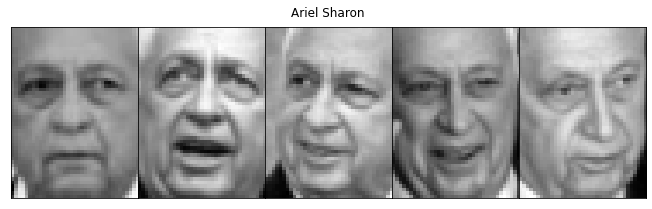

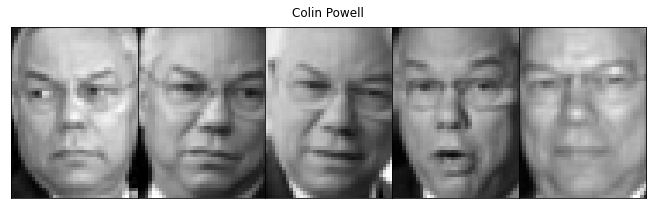

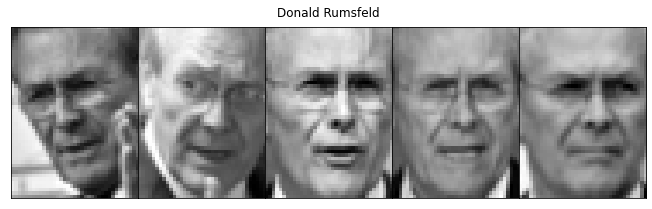

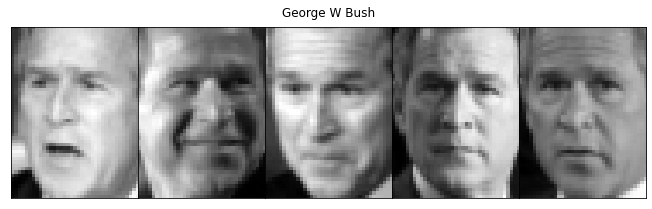

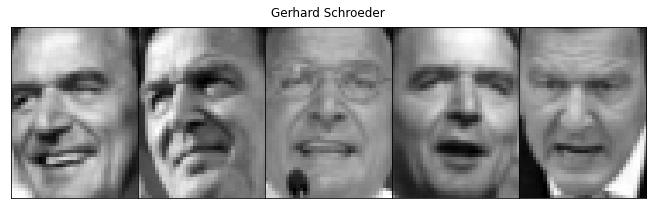

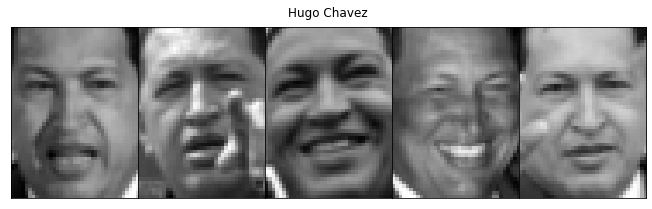

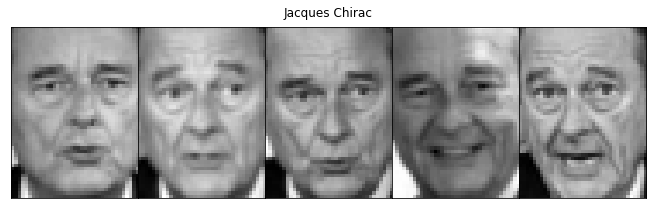

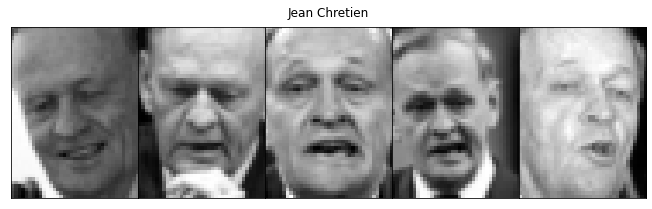

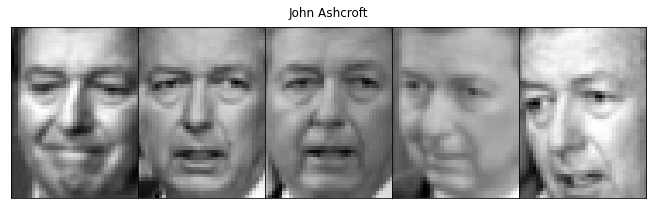

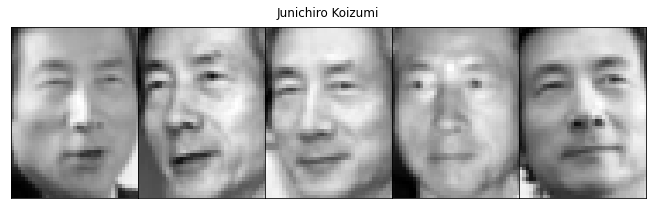

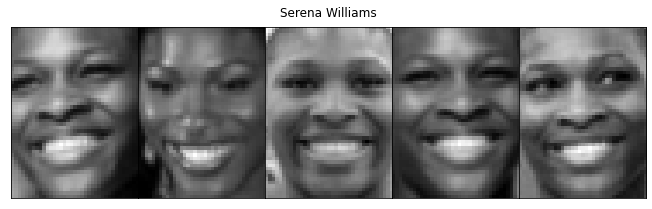

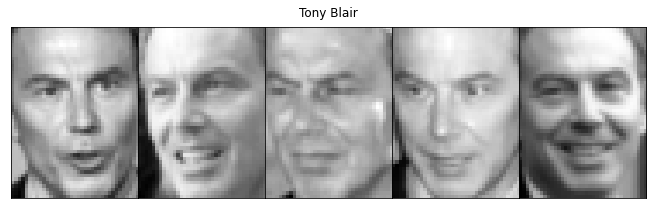

In [38]:
# Corsons un peu le problème:
# Pour chaque personnalité, affichez 5 photos de la base prises au hasard

for (i, name) in enumerate(d.target_names): 
  plot_images(d.data[d.target == i] , title= name, n_row=1, n_col=5, shuffle=True )

# Exploitation simple d'une ACP

## a. Apprentissage et reconstruction 

Dans les cellules suivantes, vous allez calculer une ACP sur ces données d'images.

Attention à la normalisation. Vous pouvez soit effectuer cette normalisation à la main, soit explorer un peu [la doc de sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

$\Rightarrow$ Appelez `data_pca` les données en basse dimension  
$\Rightarrow$ Appelez `reconstruction` le résultat de la fonction `pca.inverse_transform` appliqué à `data_pca`. De quoi s'agit-il ? Affichez le

In [90]:
from sklearn.preprocessing import StandardScaler

# Créez l'objet pca, et entrainez le sur les données...

x = d.data

# Maintenant, normalisons les données, c'est très simple avec scikit-learn
scaler = StandardScaler()
y = scaler.fit(x)
#print(dir(y))
print(y.__dict__.keys())
#print(y.mean_)
x = scaler.fit_transform(x)

# Procédons à l'ACP, avec 2 composantes
n_components = 2

# Cela se fait en créant d'abord un objet de type `PCA`
pca = PCA(n_components=n_components)

# Puis de l'appliquer sur les données (centrées-réduites) x
pca.fit(x)
x_transformed = pca.transform(x)

print('Dimension initiale des données : ', x.shape)
print('          après ACP            : ', x_transformed.shape)
# là c'est bon

# Calculez la transformée des images par ACP
data_pca = x_transformed

# calculez la reconstruction correspondante
pca_names = ['composante %d' % d for d in range(n_components)]

reconstruction = pca.inverse_transform(data_pca)

print(reconstruction)

dict_keys(['with_mean', 'with_std', 'copy', 'n_samples_seen_', 'mean_', 'var_', 'scale_'])
Dimension initiale des données :  (1560, 1850)
          après ACP            :  (1560, 2)
[[-0.12686472 -0.18808559 -0.2843973  ... -0.23044948 -0.20373565
  -0.17749518]
 [-0.37650743 -0.4209695  -0.5308239  ...  0.14531566  0.1487906
   0.16037092]
 [-0.53412014 -0.5441025  -0.63185966 ...  0.5269725   0.50257343
   0.49335232]
 ...
 [-0.01964071  0.02767696  0.08559951 ...  0.30752572  0.28028715
   0.25691137]
 [ 0.18905663  0.23207968  0.3137826  ...  0.05210044  0.03892235
   0.0231086 ]
 [-0.11380233 -0.13011336 -0.16700079 ...  0.02656762  0.02920451
   0.03409225]]


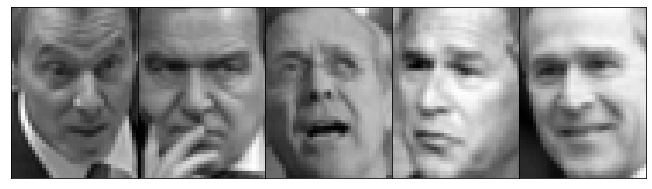

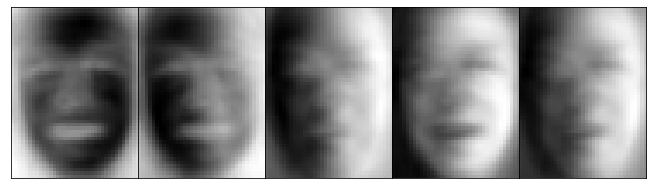

In [91]:
# Affichez sur une ligne les 5 premières images originales
plot_images(d.data, n_row=1, n_col=5, shuffle=False )

# Affichez sur une ligne leur reconstruction, en indiquant le nombre de composantes dans le titre
#plot_images(reconstruction[], n_row=1, n_col=5, shuffle=False )
plot_images(reconstruction,n_row=1, n_col=5, shuffle=False)

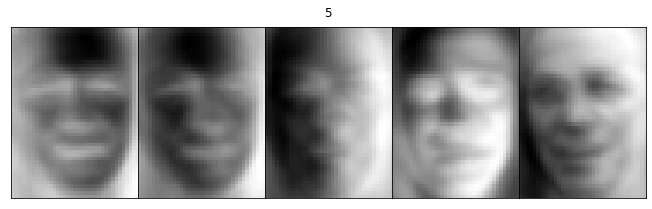

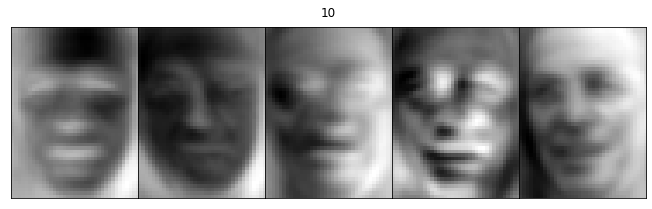

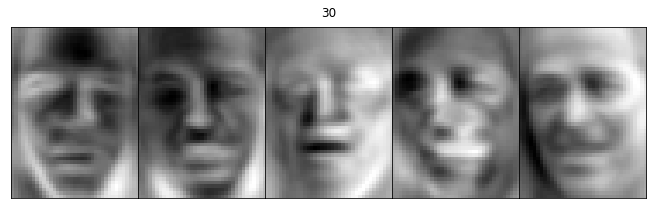

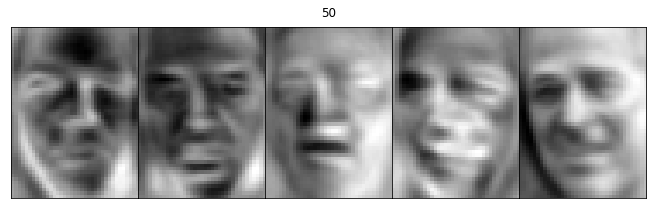

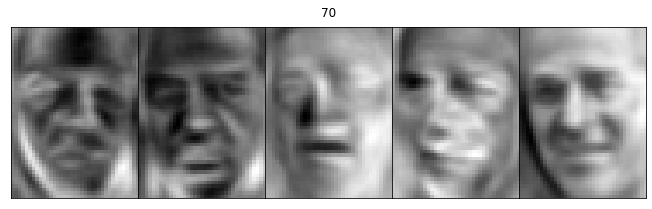

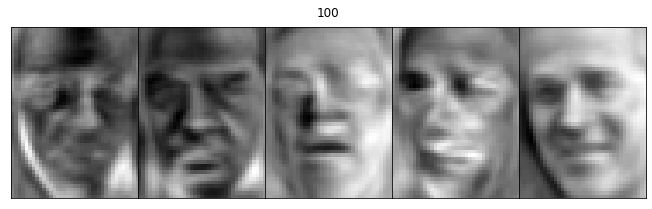

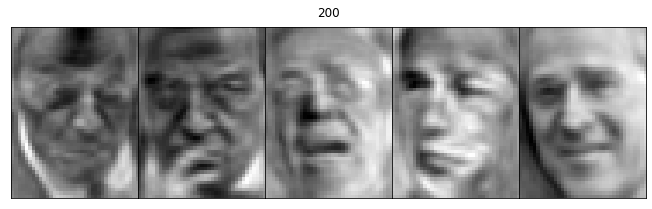

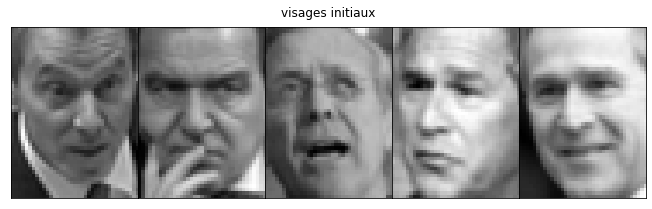

In [99]:
# Maintenant, pour les nombres de composantes suivants: 5, 10, 30, 50, 70, 100, 200, affichez les visages reconstruits sur une ligne
# puis les visages initiaux sur une ligne.
# Indice: vous avez deux options: réapprendre une ACP à chaque fois, ou bien réutiliser la même plusieurs fois.

for ncomp in [5, 10, 30, 50, 70, 100, 200]:
  n_components = ncomp

# Cela se fait en créant d'abord un objet de type `PCA`
  pca = PCA(n_components=n_components)
  pca2 = PCA(n_components=ncomp)

  # Puis de l'appliquer sur les données (centrées-réduites) x
  pca2.fit(x)
  x_transformed2 = pca2.transform(x)

  # Calculez la transformée des images par ACP
  data_pca2 = x_transformed2

  # calculez la reconstruction correspondante
  pca_names2 = ['composante %d' % d for d in range(n_components)]

  reconstruction2 = pca2.inverse_transform(data_pca2)
  plot_images(reconstruction2,n_row=1,title=n_components, n_col=5, shuffle=False)

# Affichez sur une ligne les 5 premières images originales
plot_images(d.data, 'visages initiaux', n_row=1, n_col=5, shuffle=False)


## b. Affichages par scores

Voyons si le score donné par l'ACP de `scikit-learn` peut être interprétable.

> Affichez les $10$ échantillons avec le meilleur score et les $10$ avec les pires scores. Interprétez  

In [138]:
pca2 = PCA(n_components=200)

pca2.fit(x)
x_transformed2 = pca2.transform(x)

data_pca2 = x_transformed2

pca_names2 = ['composante %d' % d for d in range(n_components)]
reconstruction2 = pca2.inverse_transform(data_pca2)
df_data_pca = pandas.DataFrame(x_transformed2, index=list(range(x.shape[0])),columns=pca_names)

# Rajoutons l'info des scores
#data_pca2['interprétabilité'] = 
print(pca2.score_samples(x))
print(df_data_pca.shape)
df_data_pca['interpretabilite'] = (pca2.score_samples(x))

# Affichage les 10 images avec le score le plus faible, et celles avec le score le plus élevé
df = df_data_pca.sort_values(by=['interpretabilite'])

print(df)

print("les dix pires scores sont :")
print(df.interpretabilite[:10])

print("les dix meilleurs scores sont :")
sorted = df.interpretabilite[-10:].sort_values(ascending=False)
print(sorted)


[-352.7055  -513.83954 -365.09296 ...  157.4599  -308.3532   241.185  ]
(1560, 200)
      composante 0  composante 1  ...  composante 199  interpretabilite
1271      7.993867      5.185421  ...        0.457054      -1324.286133
1543     19.969700     -6.134474  ...        0.953461      -1103.735840
619      66.349426    -27.907898  ...        1.135579       -937.843933
431      43.793530     -9.294160  ...        1.162029       -922.046814
622      -7.988611     14.095530  ...       -0.497346       -912.526917
...            ...           ...  ...             ...               ...
1419      0.453005     13.022346  ...       -0.356351        518.180054
13       14.084719     -1.546687  ...       -0.071261        524.227539
596       5.751867     -2.919708  ...        0.070230        534.892212
682      13.604557    -27.777813  ...       -0.103167        548.342712
1056     31.241802      0.172123  ...        0.088005        587.814026

[1560 rows x 201 columns]
les dix pires scores sont

__Interprétation__  
...

## b. Interprétation et discussion

Dans cette section, vous allez étudier certains paramètres appris par l'ACP, les afficher, et créer une cellule de texte où vous donnerez une discussion courte de ce qui vous semble pertinent.

> * Pour les affichages:  
>   $\Rightarrow$ utilisez `plt.plot`, `plt.grid`  
>   $\Rightarrow$ mettez des titres, nommez les axes
> * Pour les discussions:
>   concentrez vous sur l'essentiel: je ne noterai __PAS__ la quantité.

### `pca.explained_variance_ratio`

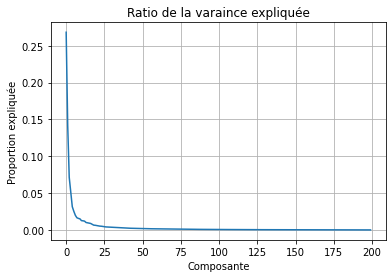

In [175]:
# Affichage de pca.explained_variance_ratio_, ainsi que de pca.explained_variance_ratio_.cumsum()
import seaborn as sns
li = range(0,200)

plt.plot(li , pca2.explained_variance_ratio_)
plt.xlabel('Composante')
plt.title('Ratio de la varaince expliquée')
plt.ylabel('Proportion expliquée')
plt.grid()


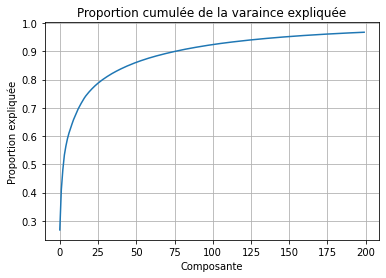

In [176]:
li = range(0,200)

plt.plot(li , pca2.explained_variance_ratio_.cumsum())
plt.xlabel('Composante')
plt.title('Proportion cumulée de la varaince expliquée')
plt.ylabel('Proportion expliquée')
plt.grid()


PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


__De quoi s'agit-il ?__  
Cela représente la qualité de l'explication des images par les composantes.


__Interprétez__  
On constate que plus la composante est grande, mieux les images sont expliquées mais que les images sont dèjà bien expliquées à partir de 25 composantes du fait de la décroissance très rapide de la courbe de la variance en fonction des composantes

### `pca.components_`

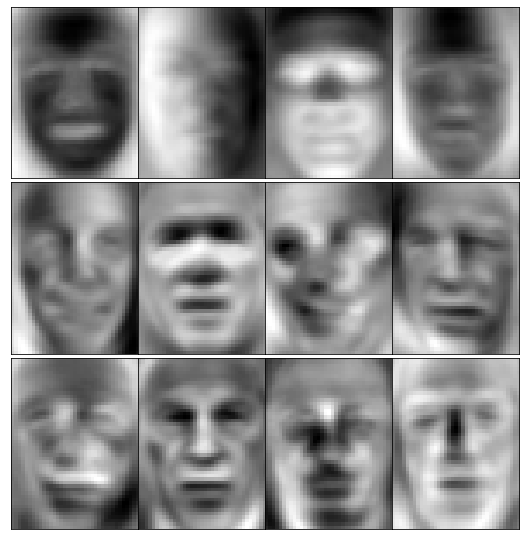

In [184]:
# Commencez par en affichez la dimension
pca2.components_.shape
# Cela devrait vous rappeler quelque chose. Affichez.
plot_images(pca2.components_, shuffle=False)

__De quoi s'agit-il ?__  
il s'agit des axes des composantes

__Interprétez__  
Plus on ajoute de composantes, meilleure est la représentation des images  

# Analyses des précipitations en France

Dans cette section, nous allons appliquer une ACP aux données de précipitations dans les grandes villes de France, déjà vues lors du premier TP. Il s'agit de rajouter l'ACP à l'arsenal d'outils de visualisation que nous avons vus. 

In [221]:
# imports
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# Chargeons les données
raw_data = pandas.read_csv('https://husson.github.io/img/pluie.csv',
                       encoding = "ISO-8859-1", sep=';')

# renommons la première colonne "Ville"
raw_data = raw_data.rename(columns = {raw_data.columns[0]:'Ville'})

# choisissons cette colonne en index
raw_data = raw_data.set_index('Ville')
dataprec = raw_data
dataprec


,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,NOVEMBREp,DECEMBREp,Précipitations annuelles,JANVIERnb.j.pl,FEVRIERnb.j.pl,MARSnb.j.pl,AVRILnb.j.pl,MAInb.j.pl,JUINnb.j.pl,JUILLETnb.j.pl,AOUTnb.j.pl,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Latitude,Longitude,Précipitations de mai à aout,Précipitations sept-oct,Géographie
Ville,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0,653.0,12.0,10.0,9.0,9.0,8.0,4.0,1.0,2.0,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,41.55,8.44,13.9,25.8,Sud
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0,690.0,16.0,13.0,12.0,12.0,13.0,10.0,11.0,11.0,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,47.28,-0.33,29.0,30.8,Ouest
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0,826.0,16.0,14.0,13.0,12.0,14.0,11.0,12.0,12.0,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,45.39,0.09,29.9,31.0,Ouest
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0,1088.0,17.0,14.0,12.0,14.0,14.0,14.0,14.0,13.0,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,47.15,6.02,35.8,35.5,Est
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0,1474.0,16.0,14.0,13.0,15.0,17.0,14.0,13.0,13.0,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,43.29,-1.34,26.0,36.8,Ouest
Bordeaux,100.0,84.0,66.0,57.0,64.0,71.0,52.0,65.0,88.0,84.0,99.0,117.0,947.0,16.0,13.0,13.0,13.0,14.0,11.0,11.0,12.0,13.0,14.0,15.0,17.0,162.0,13.33,15.4,2076.0,44.50,-0.34,26.6,31.3,Ouest
Brest,130.0,98.0,89.0,77.0,74.0,60.0,51.0,80.0,95.0,108.0,136.0,159.0,1157.0,22.0,16.0,15.0,15.0,14.0,13.0,14.0,15.0,16.0,19.0,20.0,22.0,201.0,10.77,10.2,1757.0,48.24,-4.29,22.9,28.2,Ouest
Caen,65.0,61.0,45.0,44.0,53.0,52.0,45.0,57.0,66.0,75.0,79.0,71.0,713.0,17.0,14.0,12.0,13.0,14.0,12.0,13.0,13.0,13.0,15.0,16.0,17.0,169.0,10.45,12.7,1777.0,49.11,-0.21,29.0,35.6,Nord
Clermont-Fd,28.0,27.0,30.0,41.0,78.0,79.0,48.0,70.0,58.0,43.0,39.0,30.0,571.0,12.0,11.0,9.0,12.0,12.0,12.0,9.0,10.0,10.0,11.0,12.0,12.0,132.0,10.94,16.8,1899.0,45.47,3.05,48.2,51.3,Est


## a. Utilisation simple ACP

Pour la suite:
1. Affichez une ACP des données de précipitations en 2D (deux composantes), avec pour chaque ville:
   * Son nom
   * La taille du point dépendant du volume total de précipitations
   * La couleur du point dépendant de la région.
2. Affichez une ACP du nombre de jours de pluie, calculée sur les colonnes (donc les mois), avec le nom des mois et la taille des points dépendants du nombre de jours de pluie moyen par mois. 

Index(['FEVRIERp', 'MARSp', 'AVRILp', 'MAIp', 'JUINp', 'JUILLETp', 'AOUTp',
       'SEPTEMBREp', 'OCTOBREp', 'NOVEMBREp', 'DECEMBREp'],
      dtype='object')


In [231]:
# ACP des précipitations par ville
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extrayons les données de température
data_columns = dataprec.columns[0:12]
x = dataprec[data_columns]

# Maintenant, normalisons les données, c'est très simple avec scikit-learn
scaler = StandardScaler()
y = scaler.fit(x)
#print(dir(y))
print(y.__dict__.keys())
#print(y.mean_)

x = scaler.fit_transform(x)

# Procédons à l'ACP, avec 2 composantes
n_components = 2

# Cela se fait en créant d'abord un objet de type `PCA`
pca3 = PCA(n_components=n_components)

# Puis de l'appliquer sur les données (centrées-réduites) x
pca3.fit(x)

x_transformed3 = pca3.transform(x)

print('Dimension initiale des données : ', x.shape)
print('          après ACP            : ', x_transformed3.shape)

pca_names = ['composante %d' % d for d in range(n_components)]
data_pca3 = pandas.DataFrame(x_transformed3, 
                            index=data.index,
                            columns=pca_names)

# rajoutons l'info de ville des données initiales
#print(dataprec['Ville'])
data_pca3['Géographie'] = dataprec['Géographie']
data_pca3['Précipitations annuelles'] = dataprec['Précipitations annuelles']
# affichons les premiers échantillons
data_pca3.head()



dict_keys(['with_mean', 'with_std', 'copy', 'n_samples_seen_', 'mean_', 'var_', 'scale_'])
Dimension initiale des données :  (34, 12)
          après ACP            :  (34, 2)


,composante 0,composante 1,Géographie,Précipitations annuelles
Ville,,,,
Ajaccio,-1.342505,3.772355,Sud,653.0
Angers,-1.095789,0.598962,Ouest,690.0
Angoulème,1.012135,-0.232093,Ouest,826.0
Besançon,4.387184,-2.976844,Est,1088.0
Biarritz,9.986850,-0.318951,Ouest,1474.0


In [ ]:
!pip install adjustText

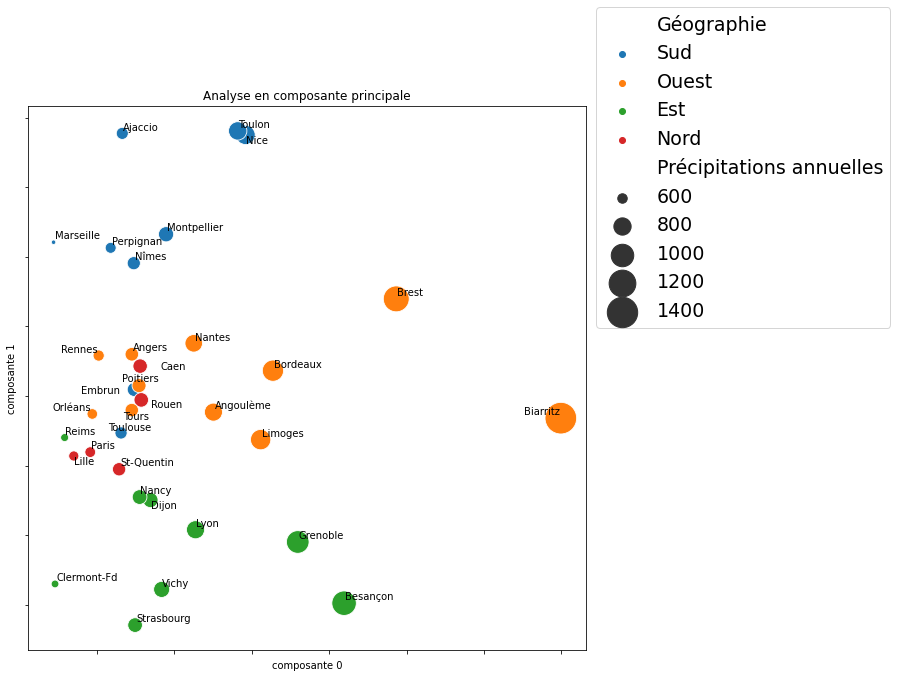

In [232]:
# le code est presque le même, on rajoute juste une information de taille

from adjustText import adjust_text
g = sns.scatterplot(x='composante 0',
                y='composante 1',
                size='Précipitations annuelles',
                sizes=(20,1000),
                data=data_pca3,
                hue='Géographie')

# on agrandit la figure, on annote...
g.figure.set_size_inches(10,10)
ax = plt.gca()
texts = []
for i, (text_x,text_y) in enumerate(data_pca3.iloc[:,:2].to_numpy()):
  texts.append(ax.annotate(data_pca3.index[i], (text_x,text_y)))
adjust_text(texts)

## on supprime les informations sur les axes, on rajout un titre et une légende
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.title('Analyse en composante principale');
plt.gca().legend(prop={'size': 19}, bbox_to_anchor=(1.0, 1.2));


In [244]:
import pandas as pd
# ACP du nombre de jours de pluie par mois
data_columns = dataprec.columns[13:25]
x_months = StandardScaler().fit_transform(dataprec[data_columns].T)

# Procédons à l'ACP, avec 2 composantes
n_components = 2
pca_names = ['composante %d' % d for d in range(n_components)]
pca_months = PCA(n_components=n_components).fit(x_months)
data_pca_months = pandas.DataFrame(pca_months.transform(x_months), 
                                    index=data_columns,
                                    columns=pca_names)




In [245]:
# On veut faire la somme de toutes les précipitations pour chaque mois et on les divise par 12

data_pca_months['moyenne']=dataprec[13:25].mean()
print(data_pca_months)


                  composante 0  composante 1    moyenne
JANVIERnb.j.pl        8.793374      3.117050  12.916667
FEVRIERnb.j.pl       -0.111981      1.239214  10.333333
MARSnb.j.pl          -2.971189     -2.724188  10.583333
AVRILnb.j.pl         -1.805804     -1.617416  10.250000
MAInb.j.pl            0.901976     -3.082390  11.166667
JUINnb.j.pl          -4.987157      0.450155   9.000000
JUILLETnb.j.pl       -7.010134      3.603099   7.916667
AOUTnb.j.pl          -4.643918      1.526459   9.166667
SEPTEMBREnb.j.pl     -3.148363     -0.638026  10.000000
OCTOBREnb.j.pl        0.877064     -1.842539  11.250000
NOVEMBREnb.j.pl       5.289494      0.291725  12.250000
DECEMBREnb.j.pl       8.816637     -0.323143  13.416667


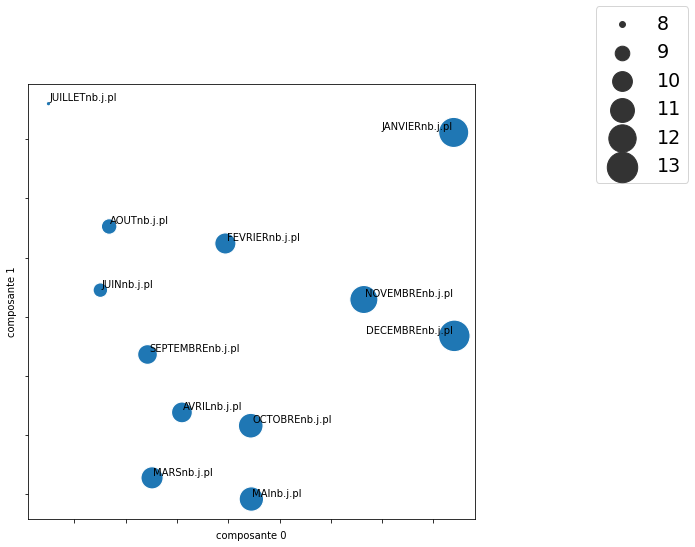

In [246]:
# Réalisons un affichage de nuage de points, où chaque donnée (mois) va apparaître 
g = sns.scatterplot(x='composante 0',
                    y='composante 1',
                    data=data_pca_months,
                    size='moyenne',
                    sizes=(20,1000))
plt.gca().legend(prop={'size': 19}, bbox_to_anchor=(1.5, 1.2));  
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.gcf().set_size_inches(8,8)
ax = plt.gca()
texts = []
for i, (text_x,text_y) in enumerate(data_pca_months.iloc[:,:2].to_numpy()):
  texts.append(ax.annotate(data_pca_months.index[i], xy=(text_x,text_y)))
adjust_text(texts);